In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [17]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # normalisasi data citra menjadi citra  biner

In [22]:
model = Sequential([                  # inisiasi model
    Flatten(input_shape=(28, 28)),    # input layer
    Dense(128, activation='relu'),    # hidden layer 1
    Dense(128, activation='relu'),    # hidden layer 2
    Dropout(0.2),                     # layer untuk mencegah overfitting
    Dense(10)                         # output layer
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
600/600 [==============================] - 8s 3ms/step - loss: 1.1650 - accuracy: 0.6245
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.5273 - accuracy: 0.8393
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.3965 - accuracy: 0.8826
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3492 - accuracy: 0.8978
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3192 - accuracy: 0.9057
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2919 - accuracy: 0.9137
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2697 - accuracy: 0.9211
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2477 - accuracy: 0.9266
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2300 - accuracy: 0.9329
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2129 - accura

In [26]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1017 - accuracy: 0.9789 - 710ms/epoch - 2ms/step


[0.10167983174324036, 0.9789000153541565]

In [29]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 969    0    2    2    1    0    2    0    2    2]
 [   0 1123    3    3    0    1    2    1    2    0]
 [   4    3 1008    5    1    0    1    4    6    0]
 [   0    0    4  991    0    5    0    2    4    4]
 [   0    0    5    1  963    0    2    6    0    5]
 [   2    0    1   10    2  868    3    0    3    3]
 [   4    3    1    1    4    3  939    0    3    0]
 [   3    5   10    3    4    1    0  990    4    8]
 [   3    0    2    4    3    2    1    2  953    4]
 [   1    2    0    6    8    1    0    2    4  985]]


0.9789

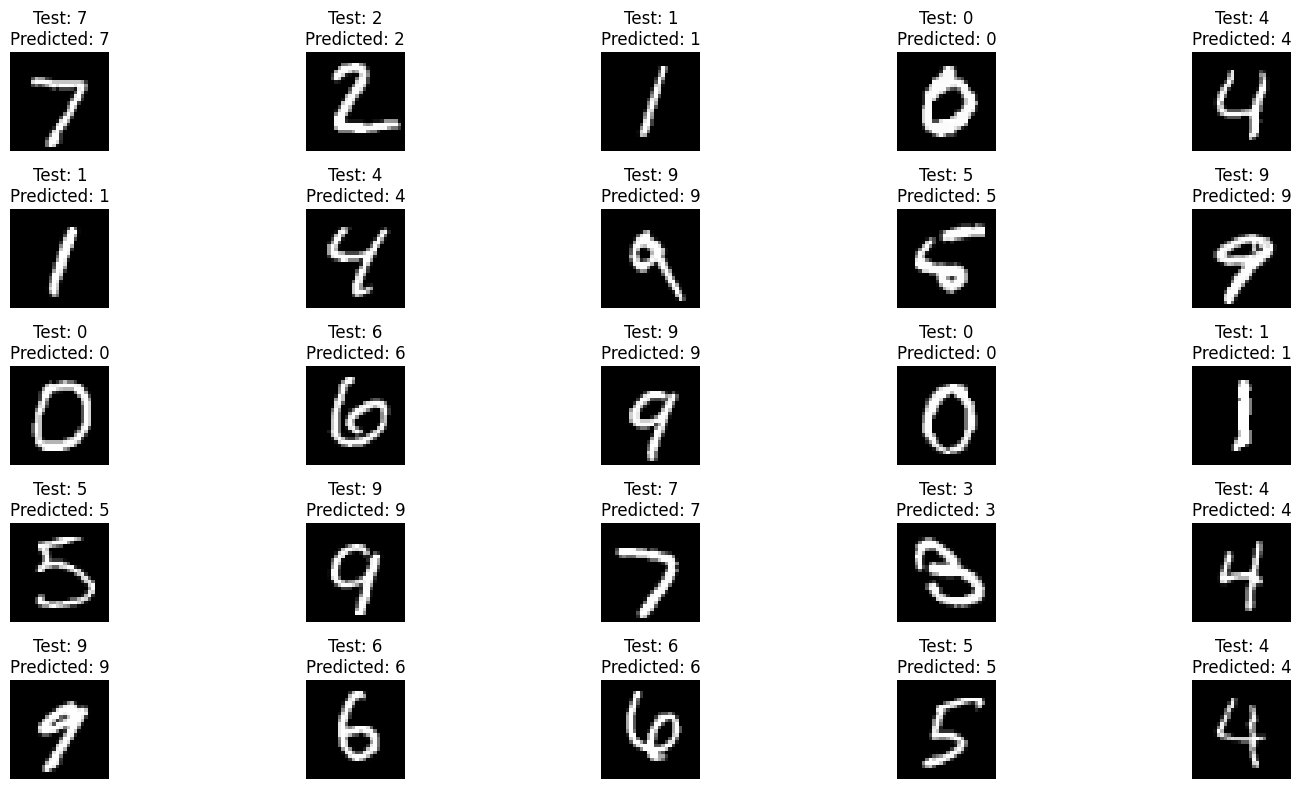

In [31]:
n_images = 25

sample_images = X_test[:n_images]
sample_labels = y_test[:n_images]

plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred[i]}",
              color='black'
              if sample_labels[i] == y_pred[i]
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()